In [ ]:
import numpy as np
import pandas as pd
import plotly
import plotly.figure_factory as ff
import plotly.graph_objs as go
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline

In [ ]:
!curl --header "Host: doc-0c-as-docs.googleusercontent.com" --header "User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/95.0.4638.54 Safari/537.36" --header "Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header "Accept-Language: en-US,en;q=0.9" --header "Cookie: AUTH_6d57tlmd151rhrgo8ik3ogr8o2g7q8kk_nonce=irs6vfvgpqfqc" --header "Connection: keep-alive" "https://doc-0c-as-docs.googleusercontent.com/docs/securesc/fev9g1e953f8o51km3me7sgfgsd0sbe5/jmuf48pjf3ekr8etifki4hbjltqr6t48/1636680975000/00484516897554883881/10673234880569198624/1C-SWfumjJYqXJ1_8WzxUQ-pMsXdBLX9P?e=download&authuser=0&nonce=irs6vfvgpqfqc&user=10673234880569198624&hash=974r9sr0c0bqt12dhkrg74paf67hlgfr" -L -o "task_b.csv"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 12874  100 12874    0     0  48581      0 --:--:-- --:--:-- --:--:-- 48581


In [ ]:
data = pd.read_csv('task_b.csv')
data=data.iloc[:,1:]

In [ ]:
data.head()

,f1,f2,f3,y
0,-195.871045,-14843.084171,5.532140,1.0
1,-1217.183964,-4068.124621,4.416082,1.0
2,9.138451,4413.412028,0.425317,0.0
3,363.824242,15474.760647,1.094119,0.0
4,-768.812047,-7963.932192,1.870536,0.0


In [ ]:
data.corr()['y']

f1    0.067172
f2   -0.017944
f3    0.839060
y     1.000000
Name: y, dtype: float64

In [ ]:
import seaborn as sns
sns.set_style(style ="whitegrid")

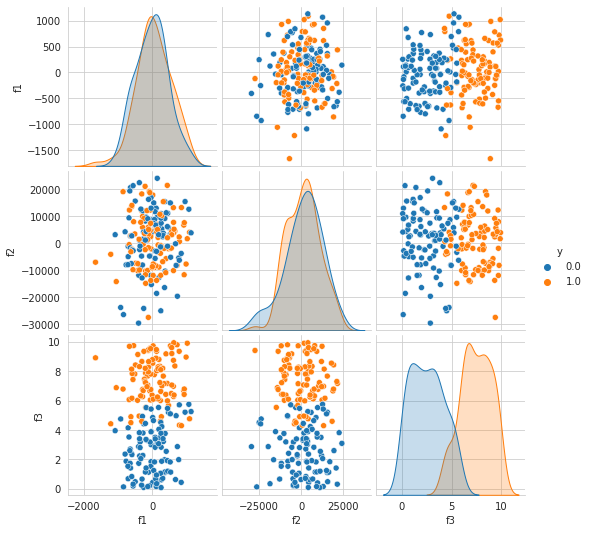

In [ ]:
sns.pairplot(data= data, hue = "y")

In [ ]:
import plotly.express as px

In [ ]:
data.std()

f1      488.195035
f2    10403.417325
f3        2.926662
y         0.501255
dtype: float64

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.close('all')

In [ ]:
import plotly.graph_objects as go
import numpy as np

x = np.outer(np.linspace(-2, 2, 30), np.ones(30))

# transpose
y = x.copy().T
z = np.cos(x ** 2 + y ** 2)

fig = go.Figure(data=[go.Surface(x=x, y=y, z=z)])

fig.update_traces(contours_z=dict(
	show=True, usecolormap=True,
	highlightcolor="limegreen",
	project_z=True))

fig.show()



In [ ]:
data.std()

f1      488.195035
f2    10403.417325
f3        2.926662
y         0.501255
dtype: float64

In [ ]:
X=data[['f1','f2','f3']].values
y=data['y'].values
print(X.shape)
print(y.shape)

(200, 3)
(200,)


# What if our features are with different variance 

<pre>
* <b>As part of this task you will observe how linear models work in case of data having feautres with different variance</b>
* <b>from the output of the above cells you can observe that var(F2)>>var(F1)>>Var(F3)</b>

> <b>Task1</b>:
    1. Apply Logistic regression(SGDClassifier with logloss) on 'data' and check the feature importance
    2. Apply SVM(SGDClassifier with hinge) on 'data' and check the feature importance

> <b>Task2</b>:
    1. Apply Logistic regression(SGDClassifier with logloss) on 'data' after standardization 
       i.e standardization(data, column wise): (column-mean(column))/std(column) and check the feature importance
    2. Apply SVM(SGDClassifier with hinge) on 'data' after standardization 
       i.e standardization(data, column wise): (column-mean(column))/std(column) and check the feature importance

</pre>

In [ ]:
def svm_clf_w_stand(X,y):
  svm_clf = Pipeline([
                  ("scalar",StandardScaler()),("clf",SGDClassifier(loss = "hinge",random_state=42))
  ])
  svm_clf.fit(X,y)
  return svm_clf[1].coef_

def log_reg_w_stand(X,y):
  log_reg_clf = Pipeline([
                  ("scalar",StandardScaler()),("clf",SGDClassifier(loss = "log",random_state=42))
  ])
  log_reg_clf.fit(X,y)
  return log_reg_clf[1].coef

def svm_clf_wo_stand(X,y):
  svm_wo_std = SGDClassifier(loss = "hinge",random_state=42)
  svm_wo_std.fit(X,y)
  return svm_wo_std.coef_

def log_reg_w_stand(X,y):
  logreg_wo_std = SGDClassifier(loss = "log",random_state=42)
  logreg_wo_std.fit(X,y)
  return logreg_wo_std.coef_


In [ ]:
#Task1:
svm_weights_wo=svm_clf_wo_stand(X,y)
norm_svm_wts_wo=svm_weights_wo/(svm_weights_wo.sum()+1e-8)
norm_svm_wts_wo
#because f2 has so high variance(1000) inspite of low corr with y(-0.017) , and f3 has so low variance yet v.good predictor of y(corr with y being high{0.83})
#the weight of f2 has also become equivalent to that of f3
#this issue, you will find in the application with std in task 2 being addressed

array([[-0.62645192,  0.82536052,  0.8010914 ]])

In [ ]:
#tak2 
svm_weights_w = svm_clf_w_stand(X,y)
norm_svm_wts_w=svm_weights_w/svm_weights_w.sum()
norm_svm_wts_w

array([[-0.14032676,  0.17347245,  0.96685431]])

In [ ]:
data.corr()['y']

f1    0.067172
f2   -0.017944
f3    0.839060
y     1.000000
Name: y, dtype: float64

In [ ]:
norm_svm_wts_wo - norm_svm_wts_w

array([[-0.48612517,  0.65188807, -0.16576291]])

In [ ]:
log_weights_w = log_reg_w_stand(X,y)
norm_log_weights_w=log_weights_w/log_weights_w.sum()
norm_log_weights_w

array([[ 0.95513528, -1.15505777,  1.19992249]])

In [ ]:
#https://stats.stackexchange.com/questions/226381/what-is-the-effect-of-low-variance-features-on-machine-learning-models
#the variance should not be decisive factor in surmising about its influence on prediction
#reasons: 1. variaance can be arbitrary in the sense that it involves unit. 
#         2. low variance data can show high correlation with 'y' and can be a good predictor, which is the case here.

<h3><font color='blue'> Make sure you write the observations for each task, why a particular feautre got more importance than others</font></h3>